# Homework #2 (due 10th of November, 11:59 PM):


### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn import tree as tr
from sklearn.metrics import mean_squared_error

In [3]:
data = datasets.load_breast_cancer() #load data set
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


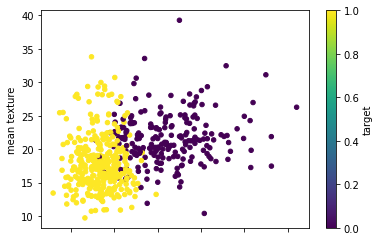

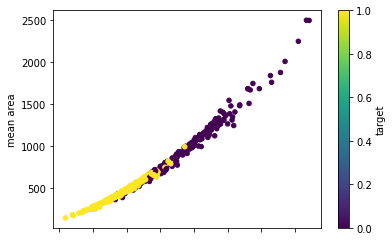

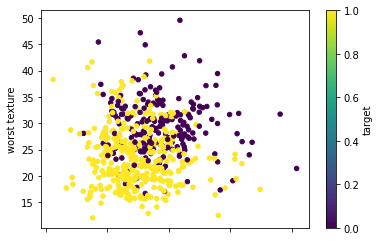

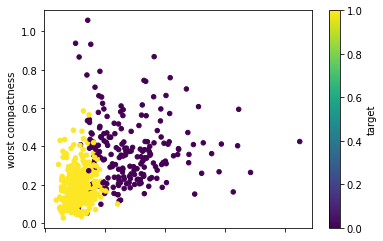

In [4]:
def scatter_plots(X,y):  # X and y must be feature , return scatter plot graph
  cancer_df.plot.scatter(x=X ,y= y,c='target',colormap='viridis')

X_y_list = [("worst radius", "mean texture"), ("mean perimeter", "mean area"), ("mean symmetry", "worst texture"), ("worst area","worst compactness")]  # I randomly chose features 
for i in X_y_list:
  scatter_plots(i[0], i[1])

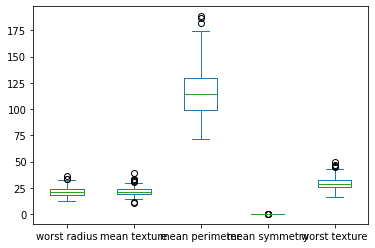

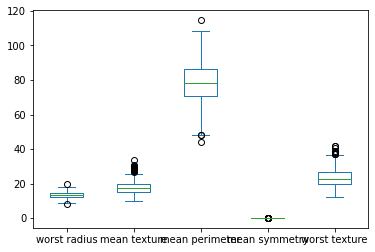

In [5]:
#Plot box plot of some features of data belonging to the zero class
cancer_df[["worst radius", "mean texture", "mean perimeter",  "mean symmetry", "worst texture"]][cancer_df['target']==0].plot.box() #I randomly chose features 

#Plot box plot of some features of data belonging to the one class
cancer_df[["worst radius", "mean texture", "mean perimeter",  "mean symmetry", "worst texture"]][cancer_df['target']==1].plot.box() #I randomly chose features 

In [6]:
#creating train and test set
#Since the size of the train set is not specifically specified in the question, I left it as default.
train_df, test_df = train_test_split(cancer_df)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


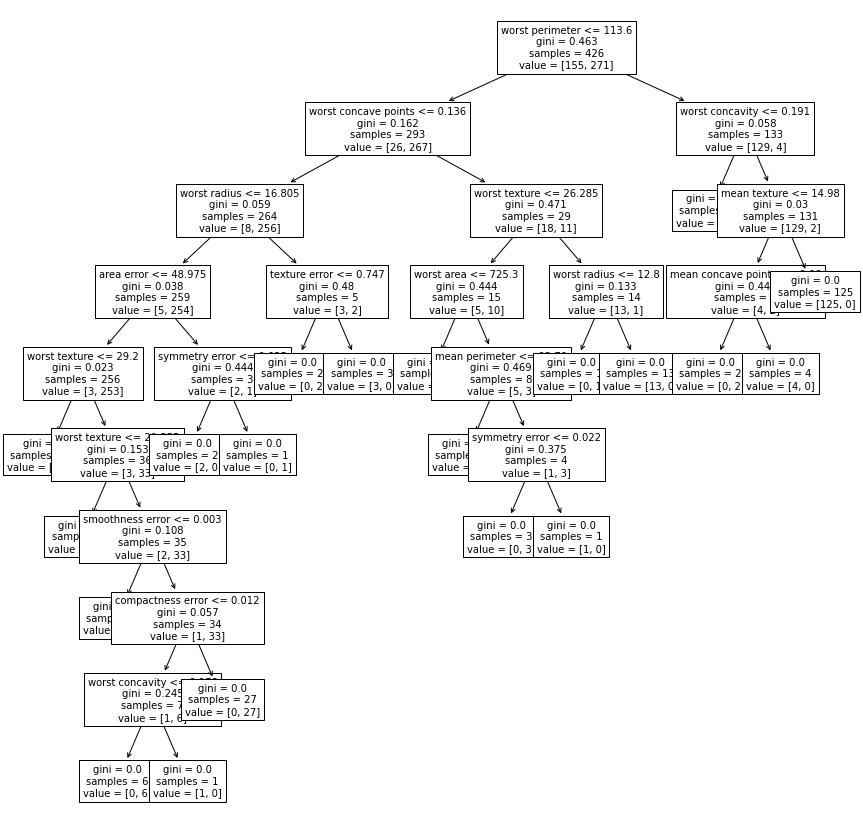

In [7]:
#creating decision tree 
tree = DecisionTreeClassifier(max_depth=10)

#train decision tree classifier with train set
tree.fit(train_df.drop('target', axis=1), train_df['target'])


pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [8]:
#the top 5 most important (discriminative) features
#tree.feature_importances_ -> array of importance value of each feature

tree_feature_importance = tree.feature_importances_.copy()
importance_list = []  #holds indexes of 5 most important features 

for i in range(5):
  importance = tree_feature_importance[0] #hold max important feature 
  importance_index = 0  #hold max important feature index 
  for j in range(1,len(tree_feature_importance)):
    if (tree_feature_importance[j] > importance) and (j not in importance_list): 
      importance = tree_feature_importance[j]
      importance_index = j
  importance_list.append(importance_index)

for i in importance_list:  #print the top 5 most important features
  print(data['feature_names'][i] + " : " + str(tree_feature_importance[i]))


worst perimeter : 0.7203690361295458
worst concave points : 0.09236680778035904
worst texture : 0.03696439584221442
worst concavity : 0.028065762895605088
worst radius : 0.026192557848313102


In [9]:
#creating logistic regression
lr_orig = LogisticRegression(C=0.01, max_iter=1000)

#train logistic regression with train set
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.01, max_iter=1000)

In [10]:
print(tree.score(test_df.drop('target', axis = 1), test_df['target']))
print(lr_orig.score(test_df.drop('target', axis = 1), test_df['target']))

#The parameters we will give to the models we will create for the decision tree classifier and
#logistic regession affect the success of the model and which model will be more successful.
#With the parameters I have given now, with high probability (decision tree classifier has been more 
#successful in some of my trials), the logistic regression model has been more successful.

0.9300699300699301
0.9370629370629371


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [25]:
from google.colab import files
uploaded = files.upload()  #upload file from local
wine_df = pd.read_csv('winequality_white.csv', sep=';') #read wine data set from csv file
wine_df

Saving winequality_white.csv to winequality_white (2).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [12]:
#creating train and test sets
wine_train_df, wine_test_df = train_test_split(wine_df)

In [26]:
best_score = 0 #holds best score
best_score_depth = 0 #holds the max depth value of the best score
best_score_split = 0  #holds the min sample split value of the best score
best_score_mean_square = 0  # holds the mean square value of the best score

for depth in range(1,20):
  for split in range(2,20):
    tree_reg = DecisionTreeRegressor(max_depth= depth, min_samples_split = split) #creating decision tree regressor model with parameters have different value
    tree_reg.fit(wine_train_df.drop('quality',axis=1),wine_train_df['quality']) #training set
    mean_square=mean_squared_error(tree_reg.predict(wine_test_df.drop('quality',axis=1)), wine_test_df['quality']) #calculating mean square error
    u=tree_reg.score(wine_test_df.drop('quality',axis=1), wine_test_df['quality']) #calculating score of model
    if u > best_score: #if current model score better than previous model score
      best_score = u
      best_score_depth = depth
      best_score_split = split
      best_score_mean_square = mean_square
print("best values of max depth and min samples split:", best_score_depth, best_score_split)
print("MSE on the test set with the best parameters:" , best_score_mean_square)


0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.15866004095152264
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.21216573915874215
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.2640370502993191
0.264037050299

In [ ]:
#References: While doing the homework, I benefited from the presentation and code examples in the lesson.
#https://www.w3schools.com/python/matplotlib_scatter.asp -> I benefited from this site in order to scatter the graph
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92 -> I benefited from this site in order to upload a winequality.csv file
#https://www.w3schools.com/python/pandas/pandas_csv.asp -> I benefited from this site in order to read csv file